Team members:
* 
* 
* 

<div class="alert alert-block alert-info">
    <h1>Autonomous Mobile Robots</h1>
    <h2> AMR_WS23_Assignment03 </h2>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.<br><br> If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.<br><br>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  ```raise NotImplementedError```. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignment is due on <b>12-11-2023</b> at <b>18:00<b>.</p>
    <h3>Questions about the Assignment:</h3>
    <p>Proactive discussions lead to better understanding. If you have questions about the assignment you are highly encourageed to post them in the LEA forum. Let's keep the forum active.</p>
    
</div>

# Kinematics [35 points]


As you already know from the lecture, the focus of kinematics is on representing the relationship between the motion of a system and the geometry and velocities of its constituent components (for a mobile base, these are the robot's wheels). In this exercise, you will develop the kinematics model of a simple differential drive robot, which is driven by two active, steerable standard fixed wheels, often supported by a passive spherical wheel. We assume that the system and the environment are ideal, i.e. there is no slippage or loss of contact at the wheels, and the surface is flat. Additionally, in this setup, only spinning of the wheels is possible, and no lateral motion (motion perpendicular to the plane of the wheel).

We will consider the schematic of the robot from slide number 6 from the lecture slides on kinematics.


<!-- In differential drive, the robot can be moved with a combination of forward and angular velocities to reach a particular position in a 2D plane.  -->

![kinematics_diagram](AMR_WS23_Assignment03_files/img/DifferentialRobot.png)

We will follow the notation below throughout this assignment:
- $R$ and $I$ are the local and global Cartesian coordinate reference frames, respectively
- The position of point $P$ at time $t$ is $(^ix_t, ^iy_t)$, which can also be represented as $({x_t}, {y_t})$ for simplicity. Similarly, its velocity at time $t$ can be represented as $({v_x}^t, {v_y}^t)$
- $l$ is the distance of point $P$ from any of the two wheels. Thus, the distance between the two wheels is $2l$
- $\theta_t$ is the angle measured from $X_I$ to $X_R$ at time $t$
- $\omega_t$ is the angular velocity of the platform at time $t$, i.e. $\omega_t = \frac{d\theta_t}{dt}$
- $\dot{\phi}_l$ and $\dot{\phi}_r$ are the angular velocities of the left and the right wheel, respectively
- ${v_l}^t$ and ${v_r}^t$ are the linear velocities of the left and the right wheel, respectively, at time $t$
- $r_l$ and $r_r$ are the radius of the left and the right wheel, respectively


In [1]:
import numpy as np
from matplotlib import pyplot as plt

/home/ibhu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Kinematic equations [15 points]

First, answer the following questions, which will assist you in building your kinematic model. Please follow the notation described above, and (if needed) define any new symbols you introduce.

1. Describe the linear velocity of both the wheels in terms of the their radius and angular velocity.

$$ v_l^t = r_l \cdot \dot{\phi}_l^t $$
$$ v_r^t = r_r \cdot \dot{\phi}_r^t $$

2. Describe the instantaneous change of the robot's orientation ($\omega_t$) in terms of linear velocities of the left and right wheels along with the distance between the two wheels. i.e. find $\frac{d\theta_t}{dt}$.

$$ \frac{d\theta_t}{dt} = \omega_t = \frac{v_l^t - v_r^t}{2l}$$

3. Describe the instantaneous change of the robot's position in terms of linear velocities of the left and right wheels and the robot's orientation. i.e. find $ \frac{dx}{dt} $ and $\frac{dy}{dt}$  with respect to the global frame $I$.


It's sufficient to rotate the average linear velocity of the two wheels on x axis. 

$$ \frac{dx}{dt} = cos(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}$$
$$ \frac{dy}{dt} = sin(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}$$

4. Convert the equations in questions 2. and 3. from instantaneous time to discrete time. i.e. integrate the equations with respect to $dt$ and describe the movements $\Delta \theta$, $\Delta x$, and $\Delta y$ in terms of $\Delta t$, $\theta_t$, $l$, ${v_l}^t$, and ${v_r}^t$ with respect to the global frame $I$.

$$ \Delta\theta = \frac{v_l^t - v_r^t}{2l}\Delta t$$

$$ \Delta x = cos(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}\Delta t$$
$$ \Delta y = sin(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}\Delta t$$

5. Finally, describe the current values, $x_t$, $y_t$, $\theta_t$ in terms of the previous values, the change of state, the angular velocities, and the dimension parameters, $x_{t-1}$, $y_{t-1}$, $\theta_{t-1}$, $\Delta t$, ${v_l}^t$, ${v_r}^t$, and $l$. i.e. create state update equations.

$$ \theta_t = \frac{v_l^t - v_r^t}{2l}\Delta t + \theta_{t-1} $$

$$ x_t = cos(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}\Delta t+ x_{t-1}$$
$$ y_t = sin(\theta_t) \cdot \frac{v_l^t + v_r^t}{2}\Delta t+ y_{t-1}$$

6. For a desired platform velocity vector of a differential drive robot, is it always possible to derive suitable wheel velocities?
    - If yes, derive the angular velocities of individual wheels of same radii for a desired platform velocity vector $v = [v_x, v_y, \omega]$, described w.r.t the global frame of refrence.
    - If not, derive the condition for which the desired platform velocity vector $v = [v_x, v_y, \omega]$, (described w.r.t the global frame) is achievable by the robot.

No, it's not possible. Indeed the kinematic model of a differential drive robot is subject to constraints. It can be expressed as:

$$
    sin(\theta) \cdot v_x - cos(\theta) \cdot v_y = 0 
$$

## Kinematic implementation [10 points]

Write code to implement the above equations and then model a 3-second movement starting from the position $(0.1, 0.1)$ with a current orientation of $\theta_0 = 0.2 rad$ in the global frame $I$. Use an update time of 0.02 seconds i.e. $\Delta t = 0.02$, and move the robot until $t_{total} = 3$. *Hint*: You may find it easier to create a class with a `state_update` function.

Print the final position and orientation of the robot with respect to the global frame for following three configurations of the robot:

1. Configuration 1: $r_l$ = 3cm, $r_r$ = 3cm, $\dot{\phi}_l$ = 1.0 $rad/s$, $\dot{\phi}_r$ = 2.0 $rad/s$
2. Configuration 2: $r_l$ = 3cm, $r_r$ = 6cm, $\dot{\phi}_l$ = 2.0 $rad/s$, $\dot{\phi}_r$ = 2.0 $rad/s$
3. Configuration 3: $r_l$ = 0.06m, $r_r$ = 0.03m, $\dot{\phi}_l$ = 57.3 $deg/s$, $\dot{\phi}_r$ = 114.6 $deg/s$

In [3]:
from math import cos, sin, pi

class KinematicSimulation:
    def __init__(self, rL, rR, phiDotL, phiDotR):
        self.pos = [0.1,0.1]
        self.theta = 0.2
        self.dt = 0.02
        self.tFinal = 3.
        self.l = 1.
        self.vL = rL * phiDotL
        self.vR = rR * phiDotR


    def updateState(self):
        
        self.theta += 0.5 * (self.vL-self.vR)/(self.l) * self.dt
        self.pos[0] += cos(self.theta) * 0.5 * (self.vL+self.vR) * self.dt
        self.pos[1] += sin(self.theta) * 0.5 * (self.vL+self.vR) * self.dt
    
    def simulate(self):
        t = 0
        while t < self.tFinal:
            self.updateState()
            t+=self.dt
        
        return self.pos[0], self.pos[1], self.theta

degToRad = lambda x : x*pi/180

c1 = KinematicSimulation(0.03, 0.03, 1., 2.)
c2 = KinematicSimulation(0.03, 0.06, 2., 2.)
c3 = KinematicSimulation(0.06, 0.03, degToRad(57.3), degToRad(114.6))

x1, y1, theta1 = c1.simulate()
x2, y2, theta2 = c2.simulate()
x3, y3, theta3 = c3.simulate()

print(f"Configuration 1 final pose  x = {x1}, y = {y1}, theta = {theta1}")
print(f"Configuration 2 final pose  x = {x2}, y = {y2}, theta = {theta2}")
print(f"Configuration 3 final pose  x = {x3}, y = {y3}, theta = {theta3}")


Configuration 1 final pose  x = 0.2328712687440658, y = 0.12381492846605649, theta = 0.1550000000000008
Configuration 2 final pose  x = 0.36668558244157057, y = 0.141588557169347, theta = 0.11000000000000125
Configuration 3 final pose  x = 0.2764249787638637, y = 0.13576311370983993, theta = 0.2


## Motion tracking [10 points]

Use the code you wrote previously to plot/track the movement of the robot given the `AMR_WS23_Assignment03_files/data/encoder.dat` file. In the `encoder.dat` file, the left column represents encoder measurement of the left wheel, and the right column the encoder measurements of the right wheel. The total number of encoder ticks is read at 10Hz and the counter is never reset, i.e. the measurements are cumulative. In this encoder, the number of ticks per rotation of a wheel is 4000. The helper code to get the angular velocity is provided below.

Graph the movement of the robot as a line (not as scatter plot) given the robot has the same parameters from the previous question, but with the following different configurations of wheels. Write your observations of the effect of the wheel radii and the velocities of the individual configurations on the motion of the robot.

Optionally, check the effect of varying the distance between the wheels and comment on its qualitative effect.

**Configuration 1:** $r_l$ = 3cm, $r_r$ = 3cm, $\dot{\phi}_l$ = 1.0 $rad/s$, $\dot{\phi}_r$ = 2.0 $rad/s$

In [4]:
import numpy as np
def get_angular_velocity(file_name, frequency, ticks_per_rotation):
    data = np.genfromtxt(file_name)
    ticks_count = np.zeros_like(data)
    ang_vel = np.zeros_like(data)
    freq = 10
    ticks_per_rotation = 4000

    for i in range (1,len(data)):
        ticks_count[i] = data[i]-data[i-1]

    ang_vel = (ticks_count*2*np.pi*freq) /ticks_per_rotation
    return ang_vel
    

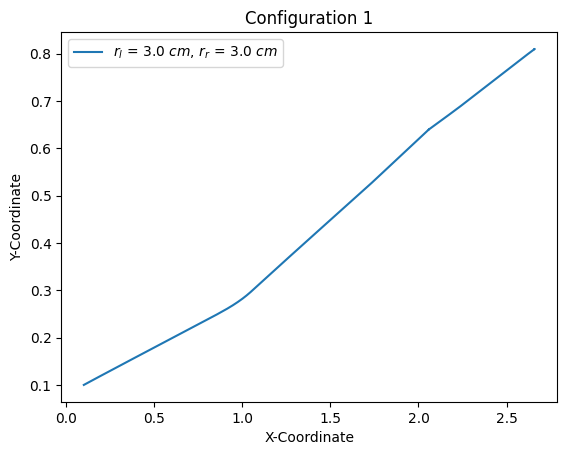

In [5]:
import numpy as np
import matplotlib.pyplot as plt

file_name = './data/encoder.dat'
ang_vel = get_angular_velocity(file_name, 10, 4000)
phiDotL = ang_vel[:, 0]
phiDotR = ang_vel[:, 1]

# slight modification required for handling non-constant phiDot
class KinematicSimulation:
    def __init__(self, rL, rR, phiDotL, phiDotR):
        self.pos = [0.1,0.1]
        self.theta = 0.2
        self.dt = 0.01
        self.l = 1.

        self.vL = rL * phiDotL
        self.vR = rR * phiDotR

    def updateState(self, vlr):
        self.theta += 0.5 * (vlr[0]-vlr[1])/(self.l) * self.dt
        self.pos[0] += np.cos(self.theta) * 0.5 * (vlr[0]+vlr[1]) * self.dt
        self.pos[1] += np.sin(self.theta) * 0.5 * (vlr[0]+vlr[1]) * self.dt
    
    def simulate(self):
        
        vlr = zip(self.vL, self.vR)

        xl = [self.pos[0]]
        yl = [self.pos[1]]

        for e in vlr:
            self.updateState(e)
            xl.append(self.pos[0])
            yl.append(self.pos[1])
       
        return xl, yl

degToRad = lambda x : x*pi/180

c1 = KinematicSimulation(0.03, 0.03, phiDotL, phiDotR)

x1, y1 = c1.simulate()

plt.plot(x1,y1, label='$r_l$ = 3.0 $cm$, $r_r$ = 3.0 $cm$')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Configuration 1')
plt.legend()
plt.show()


**Configuration 2:** $r_l$ = 3cm, $r_r$ = 6cm, $\dot{\phi}_l$ = 2.0 $rad/s$, $\dot{\phi}_r$ = 2.0 $rad/s$

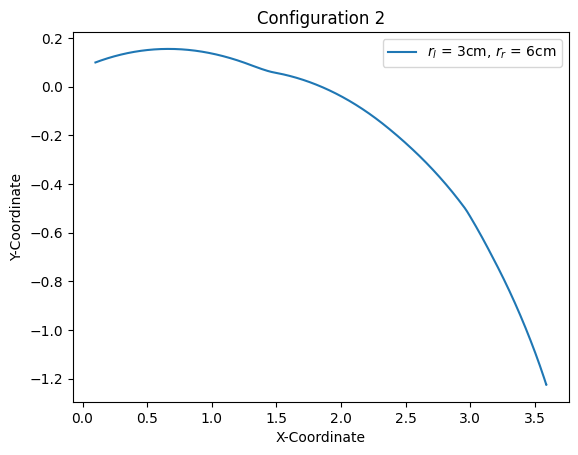

In [6]:
c2 = KinematicSimulation(0.03, 0.06, phiDotL, phiDotR)
x2, y2 = c2.simulate()
plt.plot(x2,y2, label='$r_l$ = 3cm, $r_r$ = 6cm')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Configuration 2')
plt.legend()
plt.show()

**Configuration 3:** $r_l$ = 0.06m, $r_r$ = 0.03m, $\dot{\phi}_l$ = 57.3 $deg/s$, $\dot{\phi}_r$ = 114.6 $deg/s$

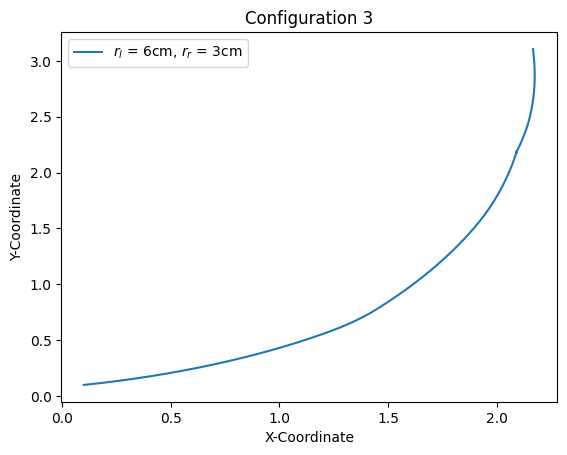

In [7]:
c3 = KinematicSimulation(0.06, 0.03, phiDotL, phiDotR)
x3, y3 = c3.simulate()
plt.plot(x3, y3, label='$r_l$ = 6cm, $r_r$ = 3cm')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Configuration 3')
plt.legend()
plt.show()


# Odometry motion model [35 points]

As you are already familiar with running the Robile in simulation and the concepts of different frames associated with it, we will now look into controlling the robot in simulation by sending commands to `/cmd_vel` topic. 

Consider a scenario where the robot has to reach a particular pose (position and orientation!) with respect to the `odom` frame. For example, consider $(x, y, \theta) = (2.0, -3.0, -2.0)$ as a desired pose with respect to the `odom` frame (where $\theta$ is, as usual, in radians), but please feel free to vary the goal pose while testing your implementation.

In this scenario, we will implement a simple motion model (called an odometry motion model) that decomposes the process of moving towards the goal into three motion components:
1. Turning towards the goal position and stop when looking towards the goal, i.e., when the positive X-axis of the `base_link` passes through the goal position.
2. Moving towards the goal in a straight line until the robot's position overlaps with the goal.
3. Rotating the robot until it reaches the goal orientation.

For this exercise, you will write your own ROS2 node, which allows you to send a goal request with the target pose with respect to `base_link`.

Hints:
* If need be, please refer to the [documentation](!https://robile-amr.readthedocs.io/en/humble/source/Tutorial/index.html#running-robile-in-simulation) for the Robile simulation.
* As a reminder, the direction in front of the robot is the `x-axis` of the `base_link` frame (and base link is a right-handed coordinate frame).
* The odometry motion model does not do any obstacle avoidance, so please make sure that the goal is within reach of the robot without any obstacles in the way while testing.
* Your robot will never be able to reach the goal exactly - for a robust behaviour, you need to use thresholds for determining when the desired position and orientation have been reached.
* Please upload the source code of your node in the data folder of this assignment file, and paste the working code of the node in the cell below as well.

In [ ]:
import rclpy
from rclpy.node import Node

from geometry_msgs.msg import Twist
from nav_msgs.msg import Odometry
from math import atan2
from tf_transformations import euler_from_quaternion

class OdometryMotion(Node):

    def __init__(self):
        super().__init__('odometry_motion')
        self.subscriber_ = self.create_subscription(Odometry, '/odom', self.callback, 10)
        self.publisher_ = self.create_publisher(Twist, '/cmd_vel', 10)
        
        self.goal = {
            "x":2.0,
            "y":-3.0,
            "theta":-2.0
        }

        self.treshold = 0.05

        self.velocity = 1.
        self.angularVelocity = 0.5


    def callback(self, msg: Odometry):
        command = Twist()

        robotPose = msg.pose.pose
        eulerAngle = euler_from_quaternion([robotPose.orientation.x, robotPose.orientation.y, robotPose.orientation.z, robotPose.orientation.w])

        positionError = ( ( robotPose.position.x - self.goal["x"] )**2 + (robotPose.position.y - self.goal["y"])**2 )**0.5
        orientationError = self.goal["theta"] - eulerAngle[2]
        faceGoalAngle = atan2(self.goal["y"] - robotPose.position.y, self.goal["x"] - robotPose.position.x)
        faceGoalError = faceGoalAngle - eulerAngle[2]

        if positionError < self.treshold and abs(orientationError) < self.treshold:
            # goal reached 
            command.linear.x = 0.
            command.angular.z = 0.

        elif positionError < self.treshold:
            # alignment
            command.angular.z = self.angularVelocity if orientationError > 0 else -self.angularVelocity
            command.linear.x = 0.
            
        elif abs(faceGoalError) < self.treshold:
            # reach goal position 
            command.angular.z = 0.
            command.linear.x = self.velocity
        
        else:
            # face the destination
            command.angular.z = self.angularVelocity if faceGoalError > 0 else -self.angularVelocity
            command.linear.x = 0.

        self.publisher_.publish(command)


def main(args=None):
    rclpy.init(args=args)

    odm = OdometryMotion()

    rclpy.spin(odm)

    odm.destroy_node()
    rclpy.shutdown()


if __name__ == '__main__':
    main()